In [25]:
# Import libraries
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from bs4 import BeautifulSoup
import pandas as pd
import os

html_tables = {}

# For every table in the datasets folder...
for table_name in os.listdir(r'C:\Users\akshg\Desktop\stock_sentiment_data'):
    #this is the path to the file. Don't touch!
    table_path = f'{table_name}'
    
    # Open as a python file in read-only mode
    table_file = open(table_path, 'r')
    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(open(table_path, 'r'))
    
    # Find 'news-table' in the Soup and load it into 'html_table'
    html_table = html.find(id='news-table')
    
    # Add the table to our dictionary
    html_tables[table_name] = html_table   

In [26]:
# Read one single day of headlines 
tsla = html_tables['tsla_22sep.html']
# Get all the table rows tagged in HTML with <tr> into 'tesla_tr'
tsla_tr = tsla.findAll('tr')

# For each row...

for i, table_row in enumerate(tsla_tr):
    # Read the text of the element 'a' into 'link_text'
    link_text = table_row.a.get_text()
    # Read the text of the element 'td' into 'data_text'
    data_text = table_row.td.get_text()
    # Print the count
    print(f'{i}:')
    # Print the contents of 'link_text' and 'data_text' 
    print(link_text)
    print(data_text)

    # # Exit the loop after three rows to prevent spamming the notebook
    # if i == 3:
    #     break

0:
Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets
Sep-21-18 09:56PM  
1:
Broadcoms Stock Looks Like a Winner
09:30PM  
2:
SHAREHOLDER ALERT:Â  Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA
05:30PM  
3:
Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm
05:30PM  
4:
Tesla Model 3 Crash Test Rating 2018: It Earns Top NHTSA Safety Rating
05:03PM  
5:
Yet Another Tesla Exec Leaves Amid Festering Finance Questions
03:26PM  
6:
7 Activist Stocks for Investors to Consider
03:18PM  
7:
CLASS ACTION UPDATE for TSLA, PDD and SBGI: Levi & Korsinsky, LLP Reminds Investors of Class Actions on Behalf of Shareholders
03:12PM  
8:
Wall Street's Reefer Madness, Micron Earnings, & More Stock News
01:53PM  
9:
Is Ford Stock Too Cheap to Ignore?
01:06PM  
10:
Tesla Slips as Another Executive Reportedly Exits
11:03AM  
11:
SHAREHOLDER ALERT - Bronstein,

In [27]:
# Hold the parsed news into a list
parsed_news = []

# Iterate through the news
for file_name, news_table in html_tables.items():
    try:
        # Check if news_table is None
        if news_table is None:
            print(f"Error: News table not found for file '{file_name}'")
            continue  # Move to the next iteration if news_table is None
        
        # Iterate through all tr tags in 'news_table'
        for x in news_table.findAll('tr'):
            # Read the text from the tr tag into text
            text = x.get_text()

            # Split the text in the td tag into a list 
            date_scrape = x.td.text.split()
            headline = x.a.text

            # If the length of 'date_scrape' is 1, load 'time' as the only element
            # If not, load 'date' as the 1st element and 'time' as the second
            if len(date_scrape) == 1:
                time = date_scrape[0]
            else:
                date = date_scrape[0]
                time = date_scrape[1]

            # Extract the ticker from the file name, get the string up to the 1st '_'  
            ticker = file_name.split('_')[0]

            # Append ticker, date, time and headline as a list to the 'parsed_news' list
            parsed_news.append([ticker, date, time, headline])
    except AttributeError as e:
        print(f"AttributeError: {e}")

print(parsed_news[:10])

Error: News table not found for file 'news_sentiment.ipynb'
[['fb', 'Jan-04-19', '06:22PM', 'Facebook, Apple, Netflix, Amazon and Alphabet Power Friday Gains'], ['fb', 'Jan-04-19', '05:15PM', 'Earnings Reports for the Week of Jan. 7-11 (BBBY, KBH)'], ['fb', 'Jan-04-19', '04:55PM', 'COLUMN-Commentary: 2019 will be the year of more state control'], ['fb', 'Jan-04-19', '04:53PM', '3 Tech Trends to Watch in 2019'], ['fb', 'Jan-04-19', '04:30PM', "Will Denver's tech growth continue in 2019?"], ['fb', 'Jan-04-19', '02:46PM', 'Facebook to Prioritize Video in 2019'], ['fb', 'Jan-04-19', '01:52PM', 'ScotteVest CEO: How a Facebook Passion Project Evolved into a New Business'], ['fb', 'Jan-04-19', '01:47PM', 'Millennials Load Up on Battered Apple, Facebook, GE'], ['fb', 'Jan-04-19', '01:00PM', 'FAANGs See a Weak Start to 2019: More Pain Ahead for ETFs?'], ['fb', 'Jan-04-19', '12:18PM', 'U[PDATE: Netflix shares soar 9% as Goldman adds stock to its Conviction List']]


In [28]:
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

In [29]:
# Use these column names
columns = ['ticker', 'date', 'time', 'headline']
# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores
scores = scored_news['headline'].apply(vader.polarity_scores)

# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame.from_records(scores)

# Join the DataFrames
scored_news = scored_news.join(scores_df)

# Convert the date column from string to datetime
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date
print(scored_news.head())

  ticker        date     time  \
0     fb  2019-01-04  06:22PM   
1     fb  2019-01-04  05:15PM   
2     fb  2019-01-04  04:55PM   
3     fb  2019-01-04  04:53PM   
4     fb  2019-01-04  04:30PM   

                                            headline  neg    neu    pos  \
0  Facebook, Apple, Netflix, Amazon and Alphabet ...  0.0  0.631  0.369   
1  Earnings Reports for the Week of Jan. 7-11 (BB...  0.0  1.000  0.000   
2  COLUMN-Commentary: 2019 will be the year of mo...  0.0  1.000  0.000   
3                     3 Tech Trends to Watch in 2019  0.0  1.000  0.000   
4        Will Denver's tech growth continue in 2019?  0.0  0.698  0.302   

   compound  
0    0.4767  
1    0.0000  
2    0.0000  
3    0.0000  
4    0.3818  


C:\Users\akshg\AppData\Local\Temp\ipykernel_6968\3228569487.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  scored_news['date'] = pd.to_datetime(scored_news.date).dt.date


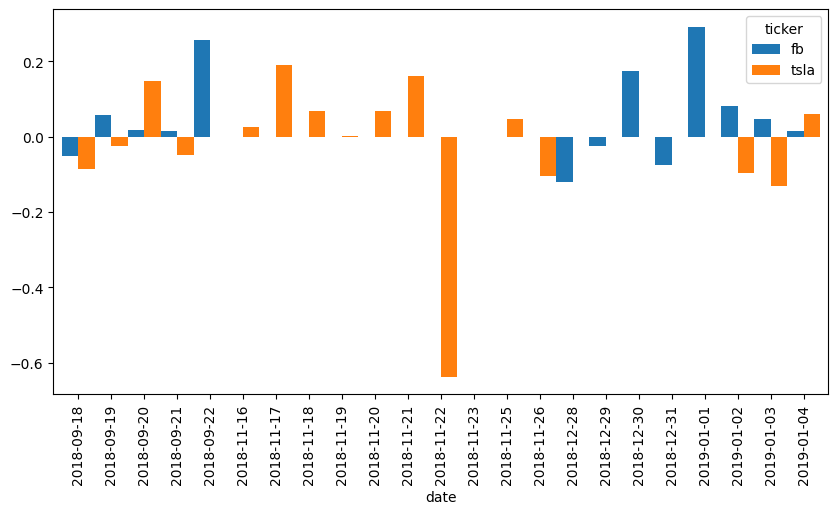

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert relevant columns to numeric data type
scored_news['compound'] = pd.to_numeric(scored_news['compound'], errors='coerce')

# Drop rows with NaN values in the 'compound' column
scored_news.dropna(subset=['compound'], inplace=True)

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scored_news.groupby(['date', 'ticker'])['compound'].mean().unstack()

# Plot a bar chart with pandas
mean_c.plot(kind='bar', figsize=(10,5), width=1)
plt.show()


In [31]:
# Count the number of headlines in scored_news (store as integer)
num_news_before = scored_news['headline'].count()

# Drop duplicates based on ticker and headline
scored_news_clean = scored_news.drop_duplicates(subset=['ticker','headline'])
                      
# Count number of headlines after dropping duplicates
num_news_after = scored_news_clean['headline'].count()
                                                        
# Print before and after numbers to get an idea of how we did 
print(f"Before we had {num_news_before} headlines, now we have {num_news_after}")

Before we had 500 headlines, now we have 476


In [45]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])
# Cross-section the fb row
single_day = single_day.xs('fb')

# Select the 3rd of January of 2019
single_day = single_day['2019-01-01']

# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time']).dt.time

# Set the index to time and 
single_day = single_day.set_index('time')

# Sort it
single_day = single_day.sort_index()
print(single_day.info())

KeyError: '2019-01-01'

In [46]:
# Print unique dates in the index
print(single_day.index.get_level_values('date').unique())

Index([2019-01-04, 2019-01-03, 2019-01-02, 2019-01-01, 2018-12-31, 2018-12-30,
       2018-12-29, 2018-12-28, 2018-09-22, 2018-09-21, 2018-09-20, 2018-09-19,
       2018-09-18],
      dtype='object', name='date')


In [47]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])
#print(single_day)
# Cross-section the fb row
single_day = single_day.loc['fb']
#print(single_day)
# Select the 3rd of January of 2019
single_day = single_day.loc['2019-01-03']
#print(single_day)
# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time'])
single_day['time'] = single_day.time.dt.time
#print(single_day)
#print(single_day.shape)
# Set the index to time and sort by it
single_day.set_index('time', inplace=True)
single_day=single_day.sort_index(ascending=True)
single_day.head()

KeyError: '2019-01-03'

In [48]:
TITLE = "Positive, negative and neutral sentiment for FB on 2019-01-03"
COLORS = ["red", "orange", "green"]
# Drop the columns that aren't useful for the plot
plot_day = single_day.drop(['headline', 'compound'], axis=1)
# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'positive', 'neutral']
# Plot a stacked bar chart
plot_day.plot.bar(stacked = True, 
                  figsize=(10, 6), 
                  title = TITLE, 
                  color = COLORS)
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel("scores");

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements